# Simple linear regression: minimal example

## Import libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

### Data generation

In [2]:
# Size of the training set
observations = 1000

# INPUT
# Generate arrays of random float
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
# Generate input as a matrix from xs and zs with dimentions: observations x 2 
generated_inputs = np.column_stack((xs, zs))

# TARGET
noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

# Save pre-formatted data in .npz file
np.savez('2_minimal_example_tf', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

In [3]:
training_data = np.load('2_minimal_example_tf.npz')

In [4]:
input_size = 2
output_size = 1

# Initialize kernel (weight) and bias - you can use the default value too
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                         bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
])

# instead of passing a default optimization fn (as optimizer='sgd' in model.compile)
# create a custom optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 20.8860
Epoch 2/100
1000/1000 - 0s - loss: 1.1940
Epoch 3/100
1000/1000 - 0s - loss: 0.4400
Epoch 4/100
1000/1000 - 0s - loss: 0.4092
Epoch 5/100
1000/1000 - 0s - loss: 0.3696
Epoch 6/100
1000/1000 - 0s - loss: 0.3860
Epoch 7/100
1000/1000 - 0s - loss: 0.3696
Epoch 8/100
1000/1000 - 0s - loss: 0.3564
Epoch 9/100
1000/1000 - 0s - loss: 0.3886
Epoch 10/100
1000/1000 - 0s - loss: 0.3705
Epoch 11/100
1000/1000 - 0s - loss: 0.3883
Epoch 12/100
1000/1000 - 0s - loss: 0.3561
Epoch 13/100
1000/1000 - 0s - loss: 0.3772
Epoch 14/100
1000/1000 - 0s - loss: 0.4087
Epoch 15/100
1000/1000 - 0s - loss: 0.4117
Epoch 16/100
1000/1000 - 0s - loss: 0.4138
Epoch 17/100
1000/1000 - 0s - loss: 0.3700
Epoch 18/100
1000/1000 - 0s - loss: 0.3925
Epoch 19/100
1000/1000 - 0s - loss: 0.3793
Epoch 20/100
1000/1000 - 0s - loss: 0.4011
Epoch 21/100
1000/1000 - 0s - loss: 0.4014
Epoch 22/100
1000/1000 - 0s - loss: 0.3891
Epoch 23/100
1000/1000 - 0s - loss: 0.37

## Extract the weigths and bias

In [5]:
model.layers[0].get_weights()

[array([[ 1.945623 ],
        [-3.0786042]], dtype=float32), array([5.022015], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.945623 ],
       [-3.0786042]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([5.022015], dtype=float32)

## Extract the outputs (make predictions)

In [8]:
model.predict_on_batch(training_data['inputs'])

<tf.Tensor: id=6822, shape=(1000, 1), dtype=float32, numpy=
array([[-21.476898  ],
       [-37.034733  ],
       [ 25.65163   ],
       [ -3.302526  ],
       [ -0.9194341 ],
       [-20.180033  ],
       [-10.197285  ],
       [ -2.7765212 ],
       [ 36.10802   ],
       [ -7.695708  ],
       [ -5.8144994 ],
       [ 17.448454  ],
       [ 40.44894   ],
       [ 19.890638  ],
       [ -3.542007  ],
       [  4.5856414 ],
       [ 16.869967  ],
       [ 29.182644  ],
       [ 30.53083   ],
       [-11.310482  ],
       [-28.889488  ],
       [  8.815267  ],
       [-19.765411  ],
       [ -6.2882514 ],
       [-13.498993  ],
       [ 18.88852   ],
       [-22.701315  ],
       [-16.132336  ],
       [-16.626183  ],
       [ -3.183125  ],
       [-15.398811  ],
       [ 24.870865  ],
       [  6.491145  ],
       [-21.249601  ],
       [ 33.369694  ],
       [ 15.574791  ],
       [  0.6656079 ],
       [-22.657032  ],
       [-10.175308  ],
       [ 41.16045   ],
       [ 17.124636  

In [9]:
 training_data['targets']

array([[-2.24452814e+01],
       [-3.77379470e+01],
       [ 2.54357920e+01],
       [-3.06859410e+00],
       [-1.76913652e+00],
       [-1.89866938e+01],
       [-9.00729639e+00],
       [-3.40858716e+00],
       [ 3.51343537e+01],
       [-7.59950714e+00],
       [-4.47415621e+00],
       [ 1.64898114e+01],
       [ 4.06730022e+01],
       [ 2.05549609e+01],
       [-3.34237121e+00],
       [ 5.67626356e+00],
       [ 1.72888469e+01],
       [ 2.80956278e+01],
       [ 2.88324809e+01],
       [-1.05521711e+01],
       [-2.92275840e+01],
       [ 7.97906398e+00],
       [-1.99511371e+01],
       [-6.09878715e+00],
       [-1.18120680e+01],
       [ 1.92672012e+01],
       [-2.13715710e+01],
       [-1.72413480e+01],
       [-1.60190602e+01],
       [-2.97215027e+00],
       [-1.48492992e+01],
       [ 2.37804431e+01],
       [ 6.60376234e+00],
       [-2.07928287e+01],
       [ 3.17741993e+01],
       [ 1.36849838e+01],
       [ 1.99688424e+00],
       [-2.29927260e+01],
       [-9.2

## Plotting the data

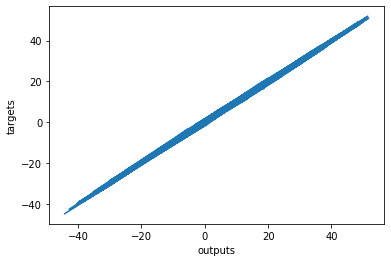

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()